In [1]:
# Python Library
import os, glob, sys
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
import numpy as np
from astropy.table import Table, vstack
import warnings
warnings.filterwarnings("ignore")

# Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl
#
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [2]:
def makeSpecColors(n, palette='Spectral'):
	#	Color palette
	import seaborn as sns
	palette = sns.color_palette(palette, as_cmap=True,)
	palette.reversed

	clist_ = [palette(i) for i in range(palette.N)]
	cstep = int(len(clist_)/n)
	clist = [clist_[i*cstep] for i in range(n)]
	return clist

In [3]:
mfilters = [f"m{str(center_lam)[0:3]}" for center_lam in np.arange(4000, 8875+125, 125)]
mcolors = np.array(makeSpecColors(len(mfilters)))[::-1]
mlamarr = np.array([float(filte[1:]) for filte in mfilters])
bfilters = ['u', 'g', 'r', 'i', 'z']

In [4]:
filter_color_palette_dict = {
	'u': 'blue',
	'g': 'green',
	'r': 'tomato',
	'i': 'crimson',
	'z': 'purple'
}

for filte, c in zip(mfilters, mcolors):
	filter_color_palette_dict[filte] = c

In [5]:
# objname = 'AT2024diq'
# ra, dec = 279.57638, -65.41778
objname = 'AT2024ett'
ra, dec = 156.664047, -39.700205
c = SkyCoord(ra, dec, unit='deg')

In [6]:
# path_processed = '/large_data/processed'
path_processed = '/large_data/processed_1x1_gain2750'
path_data = f'{path_processed}/{objname}'

In [35]:
# phot_catalogs = sorted(glob.glob(f'{path_data}/7DT??/*/calib*com.phot.cat'))
# images = sorted(glob.glob(f'{path_data}/7DT??/*/calib*com.fits'))
phot_catalogs = sorted(glob.glob(f'{path_data}/7DT??/*/calib*0.phot.cat'))
images = sorted(glob.glob(f'{path_data}/7DT??/*/calib*0.fits'))

print(f"{len(phot_catalogs)} catalogs found")
print(f"{len(images)} images found")

1480 catalogs found
1480 images found


In [33]:
for inim in images:
	_photcat = inim.replace('fits', 'phot.cat')
	# print(_photcat)
	if _photcat not in phot_catalogs:
		print(_photcat)
		images.remove(inim)

print(f"{len(phot_catalogs)} catalogs found")
print(f"{len(images)} images found")

/large_data/processed_1x1_gain2750/AT2024ett/7DT01/g/calib_7DT01_AT2024ett_20240322_013036_g_1800.com.phot.cat
/large_data/processed_1x1_gain2750/AT2024ett/7DT01/m400/calib_7DT01_AT2024ett_20240322_003319_m400_1200.com.phot.cat
/large_data/processed_1x1_gain2750/AT2024ett/7DT01/m425/calib_7DT01_AT2024ett_20240322_005601_m425_1200.com.phot.cat
/large_data/processed_1x1_gain2750/AT2024ett/7DT01/r/calib_7DT01_AT2024ett_20240322_020306_r_1800.com.phot.cat
83 catalogs found
84 images found


In [36]:
# mag_aperture_keyword = 'APER'
mag_aperture_keyword = 'AUTO'

In [37]:
outbl = Table()
outbl['image'] = [os.path.basename(inim) for inim in images]
outbl['phot_catalog'] = [os.path.basename(cat) for cat in phot_catalogs]
outbl['filter'] = ' '*10
outbl['mag'] = 0.
outbl['magerr'] = 0.
outbl['jd'] = 0.
outbl['mjd'] = 0.
outbl['UL5'] = 0.


for pp, (photcat, inim) in enumerate(zip(phot_catalogs, images)):
# for pp, photcat in enumerate(phot_catalogs):
	print(f"[{pp+1}/{len(outbl)}] {os.path.basename(inim)}")
	#
	hdr = fits.getheader(inim)
	dateobs = hdr['DATE-OBS']
	jd = hdr['JD']
	mjd = hdr['JD']
	depth = hdr['UL5_1']
	#
	prefix, unit, object_name, datestr, timestr, filte, sufix = os.path.basename(photcat).split('_')
	magkey = f"MAG_{mag_aperture_keyword}_{filte}"
	magerrkey = f"MAGERR_{mag_aperture_keyword}_{filte}"
	#
	_phot_table = Table.read(photcat, format='ascii')
	_c_phot = SkyCoord(_phot_table['ALPHA_J2000'], _phot_table['DELTA_J2000'], unit='deg')
	_indx_match, _sep, _ = c.match_to_catalog_sky(_c_phot)

	if _sep.arcsec < 1:
		mag = _phot_table[magkey][_indx_match]
		magerr = _phot_table[magerrkey][_indx_match]
	else:
		# mag, magerr = -99., -99.
		mag, magerr = np.nan, np.nan

	outbl['filter'][pp] = filte
	outbl['mag'][pp] = mag
	outbl['magerr'][pp] = magerr
	outbl['jd'][pp] = jd
	outbl['mjd'][pp] = mjd
	outbl['UL5'][pp] = depth

[1/1480] calib_7DT01_AT2024ett_20240322_010051_g_60.fits
[2/1480] calib_7DT01_AT2024ett_20240322_010152_g_60.fits
[3/1480] calib_7DT01_AT2024ett_20240322_010254_g_60.fits
[4/1480] calib_7DT01_AT2024ett_20240322_010355_g_60.fits
[5/1480] calib_7DT01_AT2024ett_20240322_010457_g_60.fits
[6/1480] calib_7DT01_AT2024ett_20240322_010558_g_60.fits
[7/1480] calib_7DT01_AT2024ett_20240322_010700_g_60.fits
[8/1480] calib_7DT01_AT2024ett_20240322_010802_g_60.fits
[9/1480] calib_7DT01_AT2024ett_20240322_010903_g_60.fits
[10/1480] calib_7DT01_AT2024ett_20240322_011005_g_60.fits
[11/1480] calib_7DT01_AT2024ett_20240322_011106_g_60.fits
[12/1480] calib_7DT01_AT2024ett_20240322_011208_g_60.fits
[13/1480] calib_7DT01_AT2024ett_20240322_011309_g_60.fits
[14/1480] calib_7DT01_AT2024ett_20240322_011411_g_60.fits
[15/1480] calib_7DT01_AT2024ett_20240322_011513_g_60.fits
[16/1480] calib_7DT01_AT2024ett_20240322_011614_g_60.fits
[17/1480] calib_7DT01_AT2024ett_20240322_011716_g_60.fits
[18/1480] calib_7DT01_A

In [49]:
outbl = outbl[np.argsort(outbl['jd'])]

In [50]:
filters = np.unique(outbl['filter'])

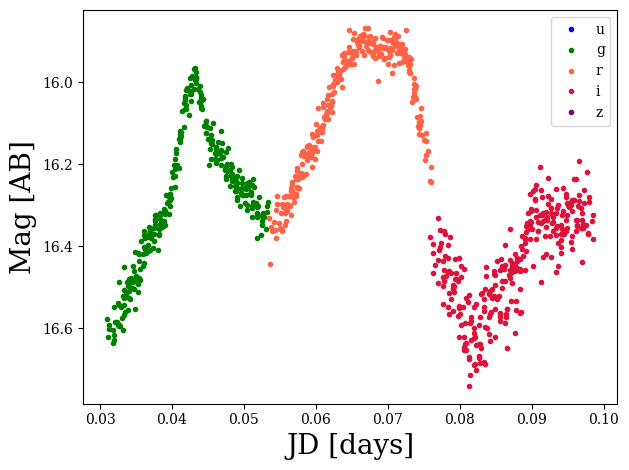

In [51]:
outbl['delt'] = outbl['jd']-outbl['jd'].min()

for filte in bfilters:
	_intbl = outbl[outbl['filter']==filte]
	plt.plot(_intbl['delt'], _intbl['mag'], '.', c=filter_color_palette_dict[filte], label=filte)
plt.legend()
yl, yu = plt.ylim()
plt.ylim([yu, yl])
plt.xlabel('JD [days]')
plt.ylabel('Mag [AB]')
plt.tight_layout()

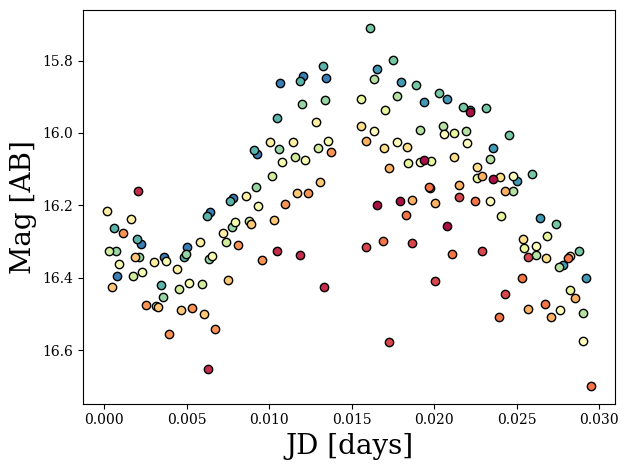

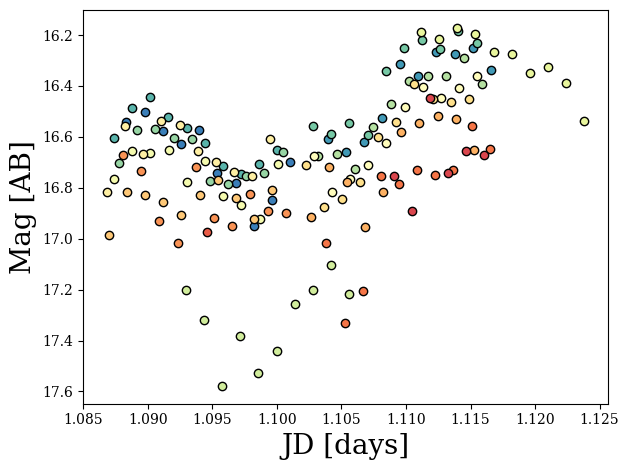

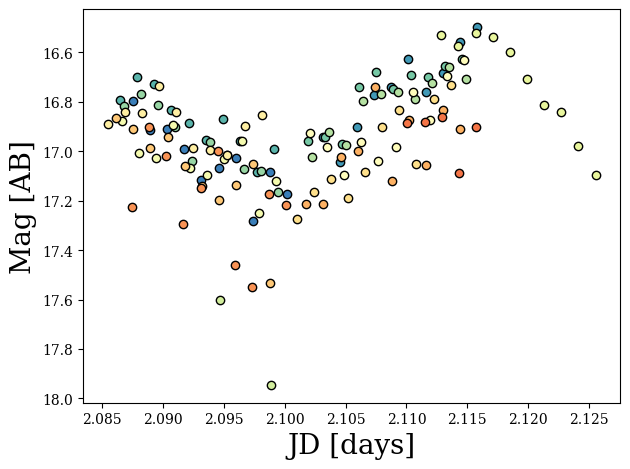

In [56]:
for jd in [0.0, 1.0, 2.0]:
	for filte in mfilters:
		_intbl = outbl[
			(outbl['filter']==filte) &
			(outbl['delt']>jd) &
			(outbl['delt']<jd+0.5)
			]
		plt.plot(_intbl['delt'], _intbl['mag'], 'o', c=filter_color_palette_dict[filte], label=filte, mec='k')

	yl, yu = plt.ylim()
	plt.ylim([yu, yl])
	plt.xlabel('JD [days]')
	plt.ylabel('Mag [AB]')
	plt.tight_layout()
	plt.show()

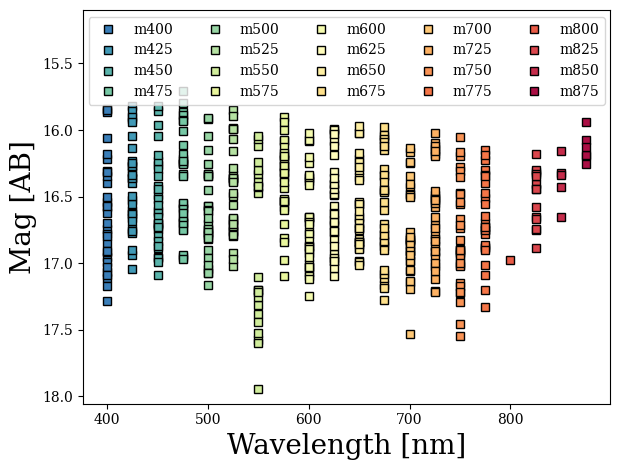

In [57]:
tablelist = []

newtbl = Table()
newtbl['filter'] = mfilters
newtbl['lam'] = mlamarr
newtbl['mag'] = 0.
newtbl['magerr'] = 0.
newtbl['jd'] = 0.
newtbl['mjd'] = 0.
newtbl['ul5'] = 0.

for ii, (filte, lam) in enumerate(zip(mfilters, mlamarr)):
	_intbl = outbl[outbl['filter']==filte]
	if len(_intbl) > 0:
		plt.plot([lam]*len(_intbl), _intbl['mag'], 's', mec='k', c=filter_color_palette_dict[filte], label=filte)

		# mag	magerr	jd	mjd	UL5
		newtbl['mag'][ii] = _intbl['mag'][0]
		newtbl['magerr'][ii] = _intbl['magerr'][0]
		newtbl['jd'][ii] = _intbl['jd'][0]
		newtbl['mjd'][ii] = _intbl['mjd'][0]
		newtbl['ul5'][ii] = _intbl['UL5'][0]

		

plt.legend(loc='upper center', ncol=5)
yl, yu = plt.ylim()
plt.ylim([yu, yl-0.5])
plt.xlabel('Wavelength [nm]')
plt.ylabel('Mag [AB]')
plt.tight_layout()